In [472]:
import numpy as np
import pymongo
import matplotlib.pyplot as plt
import pandas as pd

In [473]:
db_client = pymongo.MongoClient('localhost', 27017)

db_ice = db_client.ice
db_ice_posts = db_ice.posts
db_ice_comments = db_ice.comments
db_ice_users = db_ice.users

In [543]:
# Seleciona usuarios com mais de 10 posts
u = db_ice_users.find()
usuarios = []
for a in u:
    if a["num_posts"]>10:
        usuarios += [[a["_id"], a["posts_id"]]]

In [544]:
# Carrega usuarios e tempos do BD
for posts in usuarios:
    usu = posts[0]
    r = db_ice_posts.find({"_id": {"$in": posts[1]}})
    tempos = []
    for a in r:
        tempos += [[a["created_utc"],a["_id"]]]
    tempos = sorted(tempos, key=lambda tup: tup[0])
    posts += [tempos]

In [546]:
# Seleciona sequencia de posts de acordo com parametros
numero_minimo_da_sequencia = 9
numero_max_de_silencio = 60*60*24*15 #15 dias
posts_selecionados = []
for u in usuarios:
    nome = u[0]
    dates = u[2]
    tmp = []
    tmp_tempos = []
    for i in range(len(dates)-1):
        tmp += [[dates[i][1],dates[i][0]]]
        tmp_tempos += [dates[i][0]]
        if(dates[i+1][0]-dates[i][0] > numero_max_de_silencio):
            if(len(tmp)>numero_minimo_da_sequencia):
                posts_selecionados += [[nome,tmp]]
            tmp = []
            tmp_tempos = []
    tmp += [[dates[i+1][1],dates[i+1][0]]]
    if(len(tmp) > numero_minimo_da_sequencia):
        posts_selecionados += [[nome,tmp]]
        

In [556]:
for a in posts_selecionados:
    if not verifica_se_post_segue_ordem(a[1]):
        print("FALSE")

In [499]:
def verifica_se_post_segue_ordem(tmps):
    aux = tmps[0][1]
    for t in tmps:
        if t[1]-aux > 60*60*24*15:
            print( t[1]-aux)
            return False
        aux = t[1]
    return True

## Salva no BD

In [555]:
db_ice_geral = db_ice.geral
a = dict()
a["data"] = posts_selecionados
db_ice_geral.drop()
db_ice_geral.insert_one(a)

In [321]:
# Definicao para tamanho das Janelas
window_sizes = [i*60*60*24 for i in np.arange(0.5,10,0.5)]

In [339]:
def calcula_peso_de_frequencias(datas,frequencias,parametro_beta,bins):
    if(bins%2==0):
        print("Numero de bins precisa ser Impar")
        return;
    
    respostas = []
    
    _,funcao_de_pesos = cost_function_tang(number_sampling=bins,beta = parametro_beta)
    
    duracao_posts = np.max(datas)-np.min(datas)
    
    for phi in frequencias:
        datas_mod = []
        if(duracao_posts < (1/2)*phi):
            print("ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL")
            continue

        #Calculas os restos
        for d in datas:
            datas_mod+= [d%phi]
        hist,_ = np.histogram(datas_mod,bins=bins,range=(0,phi))
        hist = hist/np.sum(hist)
            #agora que temos nosso histograma de acordo com a janela, achamos a fase que minimiza nosso problema
        minimo_local = 10000;
        for i in range(len(hist)):
            valor_local = np.sum(funcao_de_pesos*hist)
            if(valor_local < minimo_local):
                minimo_local = valor_local
            funcao_de_pesos = np.roll(funcao_de_pesos,-1)
        if(duracao_posts < 2*phi):
            print("ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL")
            respostas += [[phi/(60*60*24),100]]    

        else:
            respostas += [[phi/(60*60*24),minimo_local]]    
        
    return respostas

In [340]:
calcula_peso_de_frequencias(posts_selecionados[0][2],window_sizes,1,5)


[[0.5, 0.07461180106295773],
 [1.0, 0.09595291643463946],
 [1.5, 0.200811648063801],
 [2.0, 0.1919058328692789],
 [2.5, 0.1883763478866414],
 [3.0, 0.16703523251495966],
 [3.5, 0.18837634788664143],
 [4.0, 0.09595291643463946],
 [4.5, 0.16703523251495966],
 [5.0, 0.1883763478866414],
 [5.5, 0.14216463216064043],
 [6.0, 0.13325881696611833],
 [6.5, 0.08704710124011733],
 [7.0, 0.1208235167889587],
 [7.5, 0.20081164806380103],
 [8.0, 0.17594104770948177],
 [8.5, 0.15459993233780006],
 [9.0, 0.21324694824096063],
 [9.5, 0.17947053269211927]]

In [341]:
pesos_dos_posts = []
for p in posts_selecionados:
    peso_tmp = calcula_peso_de_frequencias(p[2],window_sizes,1,5)
    pesos_dos_posts += [[p[0],peso_tmp]]

ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE RUIM PARA FREQUENCIA TAL
ACHOU UMA SERIE 

In [342]:
pesos_dos_posts

[['t2_2jcd8keh',
  [[0.5, 0.07461180106295773],
   [1.0, 0.09595291643463946],
   [1.5, 0.200811648063801],
   [2.0, 0.1919058328692789],
   [2.5, 0.1883763478866414],
   [3.0, 0.16703523251495966],
   [3.5, 0.18837634788664143],
   [4.0, 0.09595291643463946],
   [4.5, 0.16703523251495966],
   [5.0, 0.1883763478866414],
   [5.5, 0.14216463216064043],
   [6.0, 0.13325881696611833],
   [6.5, 0.08704710124011733],
   [7.0, 0.1208235167889587],
   [7.5, 0.20081164806380103],
   [8.0, 0.17594104770948177],
   [8.5, 0.15459993233780006],
   [9.0, 0.21324694824096063],
   [9.5, 0.17947053269211927]]],
 ['t2_115l89',
  [[0.5, 0.16436759309349946],
   [1.0, 0.14882346787204992],
   [1.5, 0.1988160499188264],
   [2.0, 0.17770579020080052],
   [2.5, 0.14105140526132515],
   [3.0, 0.12771320815402407],
   [3.5, 0.08328676060382395],
   [4.0, 0.13548527076474884],
   [4.5, 0.21215424702612748],
   [5.0, 0.16772779947592734],
   [5.5, 0.17770579020080052],
   [6.0, 0.16993372759007574],
   [6.5, 0.1

In [350]:
list.sort(pesos_dos_posts[0], key =  lambda t: t[1][1][1])

IndexError: string index out of range

In [356]:
for p in pesos_dos_posts:
    p[1].sort(key = lambda t: t[1])

In [369]:
for p in pesos_dos_posts:
    print(p[1][0])
    contagem[p[1][0][0]] = contagem[p[1][0][0]]  + 1

[0.5, 0.07461180106295773]
[3.5, 0.08328676060382395]
[1.0, 0.11135682167663977]
[1.0, 0.11549771133887615]
[1.0, 0.1149619516775979]
[1.0, 0.02487060035431924]
[1.0, 0.04145100059053206]
[1.0, 0.08337555123984544]
[1.0, 0.07772062610724763]
[7.0, 0.09524701943811195]
[7.0, 0.10662347412048033]
[0.5, 0.08351761625747983]
[7.0, 0.16101594791244933]
[3.5, 0.08351761625747983]
[4.5, 0.120200666497905]
[1.5, 0.11294958380031253]
[1.0, 0.07868068507365558]
[5.0, 0.10983956071723518]
[8.5, 0.04974120070863848]
[1.0, 0.0565240917143619]
[2.0, 0.15749683691314662]
[0.5, 0.08630251199211333]
[0.5, 0.10154616582902887]
[1.0, 0.10662347412048032]
[1.0, 0.08973526634605965]
[0.5, 0.07348131922867047]
[1.5, 0.09595291643463945]
[8.5, 0.15147889517624866]
[9.5, 0.09853474237436277]
[4.5, 0.029617631700133422]
[1.0, 0.10250678228162946]
[5.5, 0.09425062314069484]
[1.0, 0.10972323685729077]
[1.0, 0.07913372840010666]
[1.0, 0.04737257210346521]
[5.0, 0.08570242184898702]
[7.0, 0.09595291643463946]
[1.0

In [367]:
contagem = dict()
for i in np.arange(0,20,0.5):
    contagem[i] = 0

In [370]:
contagem

{0.0: 0,
 0.5: 126,
 1.0: 429,
 1.5: 17,
 2.0: 25,
 2.5: 22,
 3.0: 22,
 3.5: 27,
 4.0: 22,
 4.5: 23,
 5.0: 24,
 5.5: 16,
 6.0: 24,
 6.5: 26,
 7.0: 32,
 7.5: 26,
 8.0: 16,
 8.5: 17,
 9.0: 20,
 9.5: 20,
 10.0: 0,
 10.5: 0,
 11.0: 0,
 11.5: 0,
 12.0: 0,
 12.5: 0,
 13.0: 0,
 13.5: 0,
 14.0: 0,
 14.5: 0,
 15.0: 0,
 15.5: 0,
 16.0: 0,
 16.5: 0,
 17.0: 0,
 17.5: 0,
 18.0: 0,
 18.5: 0,
 19.0: 0,
 19.5: 0}

In [368]:
contagem

{0.0: 0,
 0.5: 0,
 1.0: 0,
 1.5: 0,
 2.0: 0,
 2.5: 0,
 3.0: 0,
 3.5: 0,
 4.0: 0,
 4.5: 0,
 5.0: 0,
 5.5: 0,
 6.0: 0,
 6.5: 0,
 7.0: 0,
 7.5: 0,
 8.0: 0,
 8.5: 0,
 9.0: 0,
 9.5: 0,
 10.0: 0,
 10.5: 0,
 11.0: 0,
 11.5: 0,
 12.0: 0,
 12.5: 0,
 13.0: 0,
 13.5: 0,
 14.0: 0,
 14.5: 0,
 15.0: 0,
 15.5: 0,
 16.0: 0,
 16.5: 0,
 17.0: 0,
 17.5: 0,
 18.0: 0,
 18.5: 0,
 19.0: 0,
 19.5: 0}

In [365]:
contagem[1] = contagem[1] + 1

In [221]:
def todias(s):
    return np.asarray(s)/(60*60*24)

### Estudo da funcao de Custo

In [269]:
def cost_function_tang(number_sampling = 5, beta = 1):
    scale = np.arange(-1,1+2/(number_sampling-1),2/(number_sampling-1))
    x = scale
    x = -beta*(x**2)
    x = np.exp(x)
    return scale, (1-x)/(1+x)

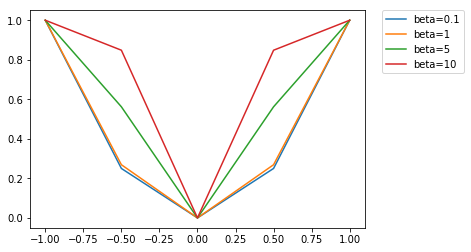

In [278]:
n_s = 5
betas = [0.1,1,5,10]
y,x =cost_function_tang(number_sampling = n_s, beta = betas[0])
y1,x1 =cost_function_tang(number_sampling = n_s, beta = betas[1])
y2,x2 =cost_function_tang(number_sampling = n_s, beta = betas[2])
y3,x3 =cost_function_tang(number_sampling = n_s, beta = betas[3])
x = x/np.max(x)
x1 = x1/np.max(x1)
x2 = x2/np.max(x2)
x3 = x3/np.max(x3)

plt.plot(y,x,label="beta=0.1")
plt.plot(y1,x1,label="beta=1")
plt.plot(y2,x2,label="beta=5")
plt.plot(y3,x3,label="beta=10")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

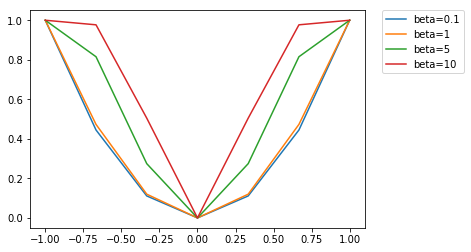

In [277]:
n_s = 7
betas = [0.1,1,5,10]
y,x =cost_function_tang(number_sampling = n_s, beta = betas[0])
y1,x1 =cost_function_tang(number_sampling = n_s, beta = betas[1])
y2,x2 =cost_function_tang(number_sampling = n_s, beta = betas[2])
y3,x3 =cost_function_tang(number_sampling = n_s, beta = betas[3])
x = x/np.max(x)
x1 = x1/np.max(x1)
x2 = x2/np.max(x2)
x3 = x3/np.max(x3)

plt.plot(y,x,label="beta=0.1")
plt.plot(y1,x1,label="beta=1")
plt.plot(y2,x2,label="beta=5")
plt.plot(y3,x3,label="beta=10")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

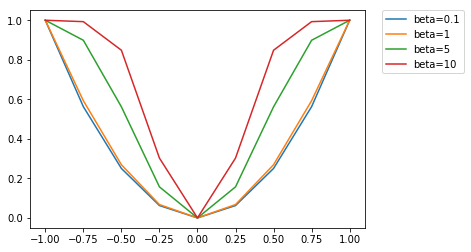

In [276]:
n_s = 9
betas = [0.1,1,5,10]
y,x =cost_function_tang(number_sampling = n_s, beta = betas[0])
y1,x1 =cost_function_tang(number_sampling = n_s, beta = betas[1])
y2,x2 =cost_function_tang(number_sampling = n_s, beta = betas[2])
y3,x3 =cost_function_tang(number_sampling = n_s, beta = betas[3])
x = x/np.max(x)
x1 = x1/np.max(x1)
x2 = x2/np.max(x2)
x3 = x3/np.max(x3)

plt.plot(y,x,label="beta=0.1")
plt.plot(y1,x1,label="beta=1")
plt.plot(y2,x2,label="beta=5")
plt.plot(y3,x3,label="beta=10")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)